In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas suite

## Exercice 1: agrégations par groupe

In [2]:
url = "https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert"
emissions = pd.read_csv(url)
emissions['dep'] = emissions["INSEE commune"].str[:2]
secteurs = emissions.select_dtypes(include='number').columns

1.  Calculer les émissions totales du secteur “Résidentiel” par département et rapporter la valeur au département le plus polluant dans le domaine. En tirer des intutitions sur la réalité que cette statistique reflète.

In [3]:
emissions_residentielles = (
    emissions
    .groupby("dep")
    .agg({"Résidentiel" : "sum"})
    .reset_index()
    .sort_values("Résidentiel", ascending = False)
)
emissions_residentielles["Résidentiel (% valeur max)"] = (
    emissions_residentielles["Résidentiel"] / 
    emissions_residentielles["Résidentiel"].max()
)
emissions_residentielles.head(5)


,dep,Résidentiel,Résidentiel (% valeur max)
59,59,3.498347e+06,1.000000
75,75,1.934580e+06,0.552998
69,69,1.774653e+06,0.507283
62,62,1.738090e+06,0.496832
57,57,1.644192e+06,0.469991


2.  Calculer, pour chaque département, les émissions totales de chaque secteur. Pour chaque département, calculer la proportion des émissions totales venant de chaque secteur.

In [4]:
# Question 2
emissions_par_departement = (
    emissions.groupby('dep').sum(numeric_only=True)
)
emissions_par_departement['total'] = emissions_par_departement.sum(axis = 1)

# Solution optimisées utilisant toutes les fonctions de pandas
emissions_par_departement["Part " + secteurs] = (
    emissions_par_departement
    .loc[:, secteurs]
    .div(emissions_par_departement['total'], axis = 0)
    .mul(100)
)
emissions_par_departement

,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,...,Part Agriculture,Part Autres transports,Part Autres transports international,Part CO2 biomasse hors-total,Part Déchets,Part Energie,Part Industrie hors-énergie,Part Résidentiel,Part Routier,Part Tertiaire
dep,,,,,,,,,,,,,,,,,,,,,
01,8.075850e+05,15647.945725,2.581109e+02,7.119048e+05,275415.025873,113596.600977,706549.858520,5.522627e+05,1.635350e+06,418646.522003,...,15.420118,0.298784,0.004928,13.593189,5.258805,2.169026,13.490942,10.544966,31.225559,7.993683
02,1.276261e+06,58834.836998,2.521642e+03,6.174937e+05,180245.578283,60366.151368,737319.268428,6.388608e+05,1.386403e+06,325014.134252,...,24.156422,1.113596,0.047728,11.687606,3.411596,1.142580,13.955603,12.092031,26.241137,6.151702
03,1.949985e+06,19686.272920,5.451597e+02,5.659226e+05,111219.488315,102975.024821,457513.404309,4.457248e+05,1.164762e+06,224487.970942,...,38.668535,0.390382,0.010811,11.222340,2.205501,2.042012,9.072567,8.838797,23.097422,4.451634
04,3.632657e+05,5851.619941,0.000000e+00,1.160564e+05,50541.206026,12184.836311,60899.229209,1.168361e+05,3.905682e+05,98228.256513,...,29.912403,0.481840,0.000000,9.556440,4.161717,1.003337,5.014628,9.620640,32.160579,8.088414
05,3.103814e+05,6216.001726,0.000000e+00,8.433816e+04,22268.075401,5455.510286,16013.281334,1.224274e+05,3.458587e+05,77885.624538,...,31.324950,0.627344,0.000000,8.511748,2.247384,0.550592,1.616125,12.355867,34.905458,7.860532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1.565447e+05,839544.846964,1.257594e+06,7.285136e+05,293317.174006,105597.205576,368638.793346,1.280296e+06,2.073377e+06,757884.411113,...,1.991331,10.679456,15.997261,9.267079,3.731150,1.343252,4.689281,16.286046,26.374452,9.640692
92,9.140818e+01,12340.794839,2.101194e+02,1.067889e+06,264497.880711,242842.018012,706597.424067,1.466794e+06,1.198420e+06,836013.153414,...,0.001577,0.212930,0.003625,18.425550,4.563695,4.190041,12.191761,25.308332,20.677765,14.424724
93,2.018471e+03,59617.086124,1.101400e+06,7.259516e+05,252166.943778,102837.663903,433216.360990,1.316452e+06,1.396911e+06,863017.791777,...,0.032277,0.953326,17.612287,11.608558,4.032355,1.644458,6.927483,21.051146,22.337751,13.800359


In [5]:
# Solution un peu plus littérale
print(f"Aggrégation pour les secteurs : {', '.join(secteurs)}")
for secteur in secteurs: 
    # Pour tous les secteurs enregistrés
    part_emissions_secteur = (
        100 *
        emissions_par_departement.loc[:, secteur] / # division ligne par ligne
        emissions_par_departement.loc[:, "total"] 
    )
    # Enregistrement dans emissions_par_departement
    emissions_par_departement.loc[:,f"Part {secteur}"] = part_emissions_secteur

Aggrégation pour les secteurs : Agriculture, Autres transports, Autres transports international, CO2 biomasse hors-total, Déchets, Energie, Industrie hors-énergie, Résidentiel, Routier, Tertiaire


On vérifie qu'on obtient la même chose

In [6]:
emissions_par_departement

,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,...,Part Agriculture,Part Autres transports,Part Autres transports international,Part CO2 biomasse hors-total,Part Déchets,Part Energie,Part Industrie hors-énergie,Part Résidentiel,Part Routier,Part Tertiaire
dep,,,,,,,,,,,,,,,,,,,,,
01,8.075850e+05,15647.945725,2.581109e+02,7.119048e+05,275415.025873,113596.600977,706549.858520,5.522627e+05,1.635350e+06,418646.522003,...,15.420118,0.298784,0.004928,13.593189,5.258805,2.169026,13.490942,10.544966,31.225559,7.993683
02,1.276261e+06,58834.836998,2.521642e+03,6.174937e+05,180245.578283,60366.151368,737319.268428,6.388608e+05,1.386403e+06,325014.134252,...,24.156422,1.113596,0.047728,11.687606,3.411596,1.142580,13.955603,12.092031,26.241137,6.151702
03,1.949985e+06,19686.272920,5.451597e+02,5.659226e+05,111219.488315,102975.024821,457513.404309,4.457248e+05,1.164762e+06,224487.970942,...,38.668535,0.390382,0.010811,11.222340,2.205501,2.042012,9.072567,8.838797,23.097422,4.451634
04,3.632657e+05,5851.619941,0.000000e+00,1.160564e+05,50541.206026,12184.836311,60899.229209,1.168361e+05,3.905682e+05,98228.256513,...,29.912403,0.481840,0.000000,9.556440,4.161717,1.003337,5.014628,9.620640,32.160579,8.088414
05,3.103814e+05,6216.001726,0.000000e+00,8.433816e+04,22268.075401,5455.510286,16013.281334,1.224274e+05,3.458587e+05,77885.624538,...,31.324950,0.627344,0.000000,8.511748,2.247384,0.550592,1.616125,12.355867,34.905458,7.860532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1.565447e+05,839544.846964,1.257594e+06,7.285136e+05,293317.174006,105597.205576,368638.793346,1.280296e+06,2.073377e+06,757884.411113,...,1.991331,10.679456,15.997261,9.267079,3.731150,1.343252,4.689281,16.286046,26.374452,9.640692
92,9.140818e+01,12340.794839,2.101194e+02,1.067889e+06,264497.880711,242842.018012,706597.424067,1.466794e+06,1.198420e+06,836013.153414,...,0.001577,0.212930,0.003625,18.425550,4.563695,4.190041,12.191761,25.308332,20.677765,14.424724
93,2.018471e+03,59617.086124,1.101400e+06,7.259516e+05,252166.943778,102837.663903,433216.360990,1.316452e+06,1.396911e+06,863017.791777,...,0.032277,0.953326,17.612287,11.608558,4.032355,1.644458,6.927483,21.051146,22.337751,13.800359


# Exercice 2

1.  Créer une copie des données de l’`ADEME` en faisant `df_wide = emissions_wide.copy()`

In [7]:
emissions_wide = emissions.copy()
emissions_wide[['Commune','dep', "Agriculture", "Tertiaire"]].head() 

,Commune,dep,Agriculture,Tertiaire
0,L'ABERGEMENT-CLEMENCIAT,01,3711.425991,367.036172
1,L'ABERGEMENT-DE-VAREY,01,475.330205,112.934207
2,AMBERIEU-EN-BUGEY,01,499.043526,10732.376934
3,AMBERIEUX-EN-DOMBES,01,1859.160954,782.404357
4,AMBLEON,01,448.966808,51.681756


2.  Restructurer les données au format *long* pour avoir des données d’émissions par secteur en gardant comme niveau d’analyse la commune (attention aux autres variables identifiantes).

In [9]:
emissions_thin = emissions_wide.\
    reset_index().\
    melt(id_vars = ['INSEE commune','Commune','dep'],
            var_name = "secteur", value_name = "emissions")
emissions_thin

,INSEE commune,Commune,dep,secteur,emissions
0,01001,L'ABERGEMENT-CLEMENCIAT,01,index,0.000000
1,01002,L'ABERGEMENT-DE-VAREY,01,index,1.000000
2,01004,AMBERIEU-EN-BUGEY,01,index,2.000000
3,01005,AMBERIEUX-EN-DOMBES,01,index,3.000000
4,01006,AMBLEON,01,index,4.000000
...,...,...,...,...,...
393773,95676,VILLERS-EN-ARTHIES,95,Tertiaire,235.439109
393774,95678,VILLIERS-ADAM,95,Tertiaire,403.404815
393775,95680,VILLIERS-LE-BEL,95,Tertiaire,13849.512001
393776,95682,VILLIERS-LE-SEC,95,Tertiaire,85.657725


**Explications :**

Initialement, on a 13 colonnes : 

- **INSEE commune**
- **Commune**
- Agriculture
- Autres transports
- Autres transports international
- CO2 biomasse hors-total
- Déchets
- Energie
- Industrie hors-énergie
- Résidentiel
- Routier
- Tertiaire
- **dep**

Le tableau est très large et on souhaite plutôt utiliser des tableaux fins. 
On veut conserver une colonne pour le code insee de la commune, le nom de la commune, ainsi que le département. Toutes les autres colonnes, on veut que le reste du tableau soit contenu dans 2 colonnes : 

- une colonne "emission" qui contient les valeurs
- une colonne "secteur" qui contient le titre des colonnes associées

une ligne : 

| Agriculture | Déchets |
|-------------|---------|
|1.0|2.0|

Devient donc :

| secteur | emissions |
|-------------|---------|
|Agriculture|1.0|
|Déchets|2.0|

3.  Faire la somme par secteur et représenter graphiquement

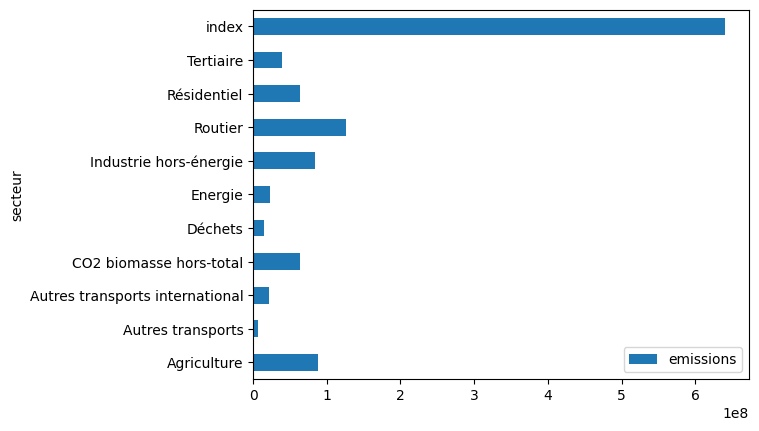

In [12]:
emissions_totales = emissions_thin.groupby('secteur').sum(numeric_only = True)
_ = emissions_totales.plot(kind = "barh") # Pour barres horizontales

*Note : la syntaxe `_ = f()` signifie qu'on associe le résultat de `f()` à rien, ie elle n'est pas sauvegardée. Cette syntaxe est particulièrement utile lors de boucles où vous n'avez pas besoin de l'indexe (ex : liste de n fois la même valeurs : `[4 for _ in range(n)]`) ou bien si une fonction renvoie plusieurs objets et on ne veut en conserver qu'un des deux (ex : `_, res = f()`). Dans le cas de l'exemple ci dessus, c'est une question purement esthétique. Si on laisse `emissions_totales.plot(kind = "barh")` on peut voir écrit juste en dessous `<Axes: ylabel='secteur'`. La syntaxe utilisée retire cette ligne.*

4.  Garder, pour chaque département, le secteur le plus polluant

In [20]:
top_commune_dep = (
  emissions_thin
 .groupby(['secteur','dep'])
 .sum(numeric_only=True).reset_index()
 .sort_values(['dep','emissions'], ascending = False)
 .groupby('dep').head(1)
)
top_commune_dep

,secteur,dep,emissions
1055,index,95,6.605425e+06
1054,index,94,1.672683e+06
1053,index,93,1.421820e+06
860,Résidentiel,92,1.466794e+06
1051,index,91,6.936734e+06
...,...,...,...
676,Routier,05,3.458587e+05
675,Routier,04,3.905682e+05
2,Agriculture,03,1.949985e+06
673,Routier,02,1.386403e+06


# Exercice 3

In [25]:
!pip install -qU pynsee xlrd

In [26]:
from pynsee.download import download_file
filosofi = download_file("FILOSOFI_COM_2016")
filosofi = (
  filosofi
  .astype(
    {c: "float" for c in filosofi.columns[2:]}
  )
)

Downloading: 100%|██████████| 2.67M/2.67M [00:00<00:00, 3.24MiB/s]
Extracting: 100%|██████████| 10.6M/10.6M [00:00<00:00, 309MB/s]


On commence par vérifier les dimensions des `DataFrames` et la structure de certaines variables clés. En l’occurrence, les variables fondamentales pour lier nos données sont les variables communales. Ici, on a deux variables géographiques: un code commune et un nom de commune.

1.  Vérifier les dimensions des *DataFrames*.

In [28]:
print("emissions : ", emissions.shape)
print("filosofi : ", filosofi.shape)

emissions :  (35798, 13)
filosofi :  (34932, 29)


2.  Identifier dans `filosofi` les noms de communes qui correspondent à plusieurs codes communes et sélectionner leurs codes. En d’autres termes, identifier les `LIBGEO` tels qu’il existe des doublons de `CODGEO` et les stocker dans un vecteur `x` (conseil: faire attention à l’index de `x`).

In [29]:
filosofi = filosofi.reset_index(drop=False)
doublons = filosofi.groupby('LIBGEO').count()['CODGEO']
doublons = doublons.loc[doublons1]
doublons = doublons.reset_index()
doublons

,LIBGEO,CODGEO
0,Abancourt,2
1,Aboncourt,2
2,Abzac,2
3,Achères,2
4,Aiglun,2
...,...,...
1446,Épieds,3
1447,Étaules,2
1448,Éterpigny,2
1449,Étréchy,3


On se focalise temporairement sur les observations où le libellé comporte plus de deux codes communes différents

3. Regarder dans `filosofi` ces observations.

In [33]:
index_doublons = filosofi['LIBGEO'].isin(doublons['LIBGEO'])
filosofi.loc[index_doublons, :]

,index,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,...,PPEN16,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16
9,9,01011,Apremont,143.0,364.5,23246.086957,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23,01027,Balan,647.0,1812.0,23696.666667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26,01030,Beauregard,363.0,884.5,21003.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,35,01039,Béon,199.0,477.0,20663.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,38,01042,Bey,113.0,295.0,24139.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34921,34921,97414,Saint-Louis,17890.0,53130.5,12843.000000,19.0,48.0,65.0,51.0,...,14.2,5.6,22.5,6.3,11.7,4.5,-10.9,7291.500000,27378.888889,3.754905
34922,34922,97415,Saint-Paul,37064.0,105829.0,16279.354839,35.0,33.0,42.0,34.0,...,14.5,8.2,12.1,3.4,6.8,1.9,-14.6,7962.424242,39826.000000,5.001743
34923,34923,97416,Saint-Pierre,31373.0,85424.5,14709.333333,28.0,39.0,47.0,38.0,...,15.1,7.5,15.9,4.2,8.3,3.4,-12.9,7612.000000,35092.222222,4.610119
34925,34925,97418,Sainte-Marie,11640.0,33780.5,16722.380952,33.0,31.0,45.0,34.0,...,12.6,6.0,12.7,4.0,6.0,2.7,-13.2,8364.000000,37836.250000,4.523703


4. Pour mieux y voir, réordonner la base obtenue par order alphabétique.

In [34]:
filosofi.loc[index_doublons, :].sort_values('LIBGEO')

,index,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,...,PPEN16,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16
21815,21815,59001,Abancourt,182.0,477.0,22772.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22463,22463,60001,Abancourt,249.0,605.5,18545.625000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20781,20781,57001,Aboncourt,125.0,339.0,20887.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19449,19449,54003,Aboncourt,48.0,109.5,18586.153846,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12323,12323,33001,Abzac,801.0,1880.5,18786.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,6118,18090,Étréchy,191.0,433.0,19814.666667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34440,34440,91226,Étréchy,2756.0,6585.0,25032.500000,70.0,6.0,NaN,NaN,...,35.0,8.5,2.8,1.5,0.7,0.6,-18.8,14681.714286,39019.333333,2.657682
18388,18388,51239,Étréchy,46.0,111.5,21155.238095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30178,30178,77173,Étrépilly,291.0,831.5,23500.800000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5. Déterminer la taille moyenne (variable nombre de personnes: `NBPERSMENFISC16`) et quelques statistiques descriptives de ces données. Comparer aux mêmes statistiques sur les données où libellés et codes communes coïncident.

In [48]:
# syntaxe ~pd.Series -logical not
print(~pd.Series([True, False, False, True],dtype=bool ))

# Attention, ça ne marche pas partout, c'est une syntaxe spécifique à pandas
print("####")
print(~True)

0    False
1     True
2     True
3    False
dtype: bool
####
-2


In [35]:
print(10*"--" + "Communes dupliquées" + 10*"--")
print(filosofi.loc[index_doublons, 'NBPERSMENFISC16'].describe())
print(10*"--" + "Communes non dupliquées" + 10*"--")
print(filosofi.loc[~index_doublons, 'NBPERSMENFISC16'].describe())

--------------------Communes dupliquées--------------------
count      3302.000000
mean       1610.143247
std        6229.752735
min          88.000000
25%         226.000000
50%         439.250000
75%        1006.125000
max      145395.500000
Name: NBPERSMENFISC16, dtype: float64
--------------------Communes non dupliquées--------------------
count    2.810300e+04
mean     2.192490e+03
std      1.603009e+04
min      7.600000e+01
25%      2.545000e+02
50%      5.420000e+02
75%      1.320250e+03
max      2.074630e+06
Name: NBPERSMENFISC16, dtype: float64


6. Vérifier les grandes villes (plus de 100 000 personnes), la proportion de villes pour lesquelles un même nom est associé à différents codes commune.

In [49]:
emissions_big_city = filosofi.loc[filosofi['NBPERSMENFISC16']100000].copy()
emissions_big_city['probleme'] = emissions_big_city['LIBGEO'].isin(doublons['LIBGEO'])
emissions_big_city['probleme'].mean() 
emissions_big_city[emissions_big_city['probleme']]
print(100*emissions_big_city['probleme'].mean()) 

8.333333333333332


7. Vérifier dans `filosofi` les villes dont le libellé est égal à Montreuil. Vérifier également celles qui contiennent le terme *‘Saint-Denis’*.

In [50]:
filosofi[filosofi['LIBGEO'] == 'Montreuil']
filosofi[filosofi['LIBGEO'].str.contains('Saint-Denis')].head(10)

,index,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,...,PPEN16,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16
290,290,01344,Saint-Denis-lès-Bourg,2562.0,6036.0,23258.000000,63.0,7.0,NaN,NaN,...,35.2,10.6,3.7,1.9,0.9,0.8,-17.0,13560.00000,40126.666667,2.959194
291,291,01345,Saint-Denis-en-Bugey,965.0,2280.0,21464.000000,53.0,NaN,NaN,NaN,...,32.4,8.2,3.9,2.2,0.9,0.9,-14.4,12929.52381,34075.333333,2.635467
1177,1177,02818,Villiers-Saint-Denis,365.0,901.0,22221.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3906,3906,11339,Saint-Denis,224.0,473.5,18477.142857,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4824,4824,14571,Saint-Denis-de-Mailloc,124.0,298.5,20859.523810,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4825,4825,14572,Saint-Denis-de-Méré,331.0,770.5,20080.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5874,5874,17323,Saint-Denis-d'Oléron,733.0,1401.0,21364.166667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6231,6231,18204,Saint-Denis-de-Palin,125.0,314.5,21446.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7031,7031,21442,Morey-Saint-Denis,285.0,663.5,25945.714286,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8518,8518,25129,Chassagne-Saint-Denis,50.0,116.0,21356.666667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exercice 4

En premier lieu, on va calculer l’empreinte carbone de chaque commune.

1.  Créer une variable `emissions` qui correspond aux émissions totales d’une commune

In [52]:
emissions['emissions'] = emissions.sum(axis = 1, numeric_only = True)
emissions

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,dep,emissions
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,01,11448.849883
1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,01,2665.623238
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934,01,126519.378237
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357,01,13585.734878
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756,01,2137.169533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35793,95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,176.098160,309.627908,235.439109,95,5251.336280
35794,95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,1395.529811,18759.370071,403.404815,95,45417.617584
35795,95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,22613.830247,12217.122402,13849.512001,95,118968.314182
35796,95682,VILLIERS-LE-SEC,1090.890170,NaN,NaN,326.748418,108.969749,2.354558,6.911213,67.235487,4663.232127,85.657725,95,12703.998894


2.  Faire une jointure à gauche entre les données d’émissions et les données de cadrage[1].

In [54]:
emissions_merged = (
    emissions.reset_index()
    .merge(filosofi, left_on = "INSEE commune", right_on = "CODGEO")
)
emissions_merged

,index_x,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,...,PPEN16,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16
0,0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,...,27.0,8.8,6.9,2.8,2.1,2.0,-15.7,10457.083333,33880.555556,3.239962
3,3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34866,35793,95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34867,35794,95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34868,35795,95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,...,17.0,3.6,14.8,6.2,4.5,4.2,-11.9,8369.302326,25531.428571,3.050604
34869,35796,95682,VILLIERS-LE-SEC,1090.890170,NaN,NaN,326.748418,108.969749,2.354558,6.911213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3.  Calculer l’empreinte carbone (émissions totales / population).

In [55]:
emissions_merged['empreinte'] = emissions_merged['emissions']/emissions_merged['NBPERSMENFISC16']
emissions_merged['empreinte'] = emissions_merged['empreinte'].astype(float)
emissions_merged

,index_x,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,...,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16,empreinte
0,0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.392017
1,1,01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.748481
2,2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577908,NaN,10313.446515,5314.314445,998.332482,2930.354461,...,8.8,6.9,2.8,2.1,2.0,-15.7,10457.083333,33880.555556,3.239962,8.892281
3,3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.171871
4,4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34866,35793,95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.296738
34867,35794,95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.133036
34868,35795,95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,...,3.6,14.8,6.2,4.5,4.2,-11.9,8369.302326,25531.428571,3.050604,4.039328
34869,35796,95682,VILLIERS-LE-SEC,1090.890170,NaN,NaN,326.748418,108.969749,2.354558,6.911213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.574462


A ce stade nous pourrions avoir envie d’aller vers la modélisation pour essayer d’expliquer les déterminants de l’empreinte carbone à partir de variables communales. Une approche inférentielle nécessite néanmoins pour être pertinente de vérifier en amont des statistiques descriptives.

4.  Sortir un histogramme en niveau puis en log de l’empreinte carbone communale.

count    31344.000000
mean        27.889859
std        132.827407
min          1.979536
25%         12.002737
50%         19.003544
75%         31.317793
max      20329.745490
Name: empreinte, dtype: float64

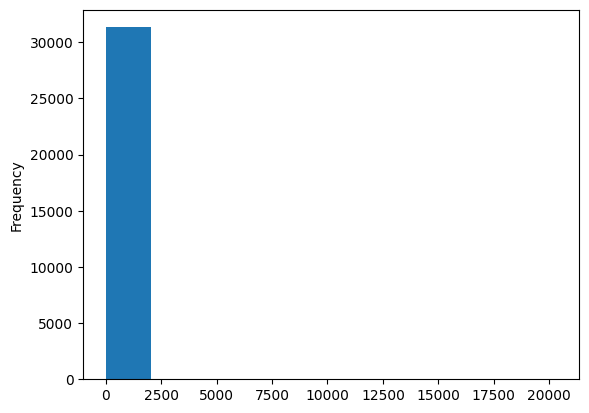

In [56]:
emissions_merged['empreinte'].plot(kind = 'hist')
np.log(emissions_merged['empreinte']).plot(kind = 'hist')
emissions_merged['empreinte'].describe()

Avec une meilleure compréhension de nos données, nous nous rapprochons de la statistique inférentielle. Néanmoins, nous avons jusqu’à présent construit des statistiques univariées mais n’avons pas cherché à comprendre les résultats en regardant le lien avec d’autres variables. Cela nous amène vers la statistique bivariée, notamment l’analyse des corrélations. Ce travail est important puisque toute modélisation ultérieure consistera à raffiner l’analyse des corrélations pour tenir compte des corrélations croisées entre multiples facteurs. On propose ici de faire cette analyse de manière minimale.

5.  Regarder la corrélation entre les variables de cadrage et l’empreinte carbone. Certaines variables semblent-elles pouvoir potentiellement influer sur l’empreinte carbone ?

3     0.711320
2     0.212460
7     0.099389
36    0.075507
6     0.061245
33    0.055962
1     0.048857
5     0.043193
18    0.031463
32    0.031326
Name: empreinte, dtype: float64


<Axes: ylabel='index'>

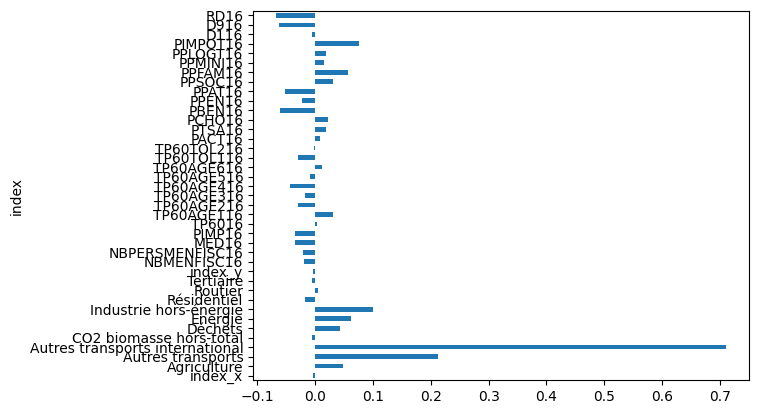

In [62]:
correlation = emissions_merged.corr(numeric_only=True)['empreinte']
correlation = correlation.reset_index()
correlation = correlation.loc[~correlation['index'].isin(["empreinte","emissions"])]
print(correlation['empreinte'].nlargest(10))

correlation.set_index("index")['empreinte'].plot(kind = "barh")


# Exercice supplémentaire

In [76]:
import duckdb
coiffeurs = duckdb.sql("""
  SELECT
    siren, siret, dateDebut, enseigne1Etablissement, activitePrincipaleEtablissement, denominationUsuelleEtablissement
  FROM
    read_parquet('https://minio.lab.sspcloud.fr/lgaliana/data/sirene2024.parquet')
  WHERE
    activitePrincipaleEtablissement == '96.02A'
    AND
    denominationUsuelleEtablissement IS NOT NULL
""")
coiffeurs = coiffeurs.df()

Dans cet exercice, nous allons considérer exclusivement la variable `denominationUsuelleEtablissement`.

1.  Dans cette base, `[ND]` est un code pour valeur manquante. Comme `Python` n’a pas de raison de le savoir *a priori* et donc d’avoir interprété ces valeurs comme étant manquantes, utiliser la méthode `replace` pour remplacer `[ND]` par un champ textuel vide. Recoder également les valeurs manquantes sous forme de champ textuel vide afin d’éviter des erreurs ultérieures liées à l’impossibilité d’appliquer certaines méthodes textuelles aux valeurs manquantes.

In [78]:
coiffeurs['denominationUsuelleEtablissement'] = \
    coiffeurs['denominationUsuelleEtablissement'].replace('[ND]', '').fillna('')

2.  Rechercher toutes les observations où le terme `tif` apparaît en faisant attention à la capitalisation de la variable. Regarder quelques observations

In [79]:
coiffeurs_tif = duckdb.sql("""
  SELECT
    siren, siret, dateDebut, enseigne1Etablissement, activitePrincipaleEtablissement, denominationUsuelleEtablissement
  FROM
    read_parquet('https://minio.lab.sspcloud.fr/lgaliana/data/sirene2024.parquet')
  WHERE
    activitePrincipaleEtablissement == '96.02A'
    AND
    denominationUsuelleEtablissement IS NOT NULL
    AND
    contains(lower(denominationUsuelleEtablissement), 'tif')
""")
coiffeurs_tif = coiffeurs_tif.df()

3.  A partir de [cet exemple](https://stackoverflow.com/a/23996414/9197726), normaliser les noms des salons en retirant les caractères spéciaux et compter les jeux de mots les plus fréquents

In [81]:
import re
coiffeurs_tif["denominationUsuelleEtablissementClean"] = \
    coiffeurs_tif["denominationUsuelleEtablissement"].\
        apply(lambda ch : re.sub('[^a-zA-Z0-9 \n\.]', '', ch))

Il n'y a pas de manière directe de repérer des jeux de mots, il faut alors les repérer à la main de manière incrémentale.

In [126]:
def spot_jeu_de_mot(ch : str)-> int:
    words = ch.lower().replace("  ", " ").split(" ")
    nwords = len(words)
    for i, word in enumerate(words):
        if "tif" in word: 
            if "tiffany"        in word: return "tiffany"
            elif "creatif"      in word: return "creatif"
            elif "motif"        in word: return "motif"
            elif "britif"       in word: return "british"
            elif "evolutif"     in word: return "evolutif"
            elif "objectif"     in word: return "objectif"
            elif "sympa"        in word: return "sympathique"
            elif "infinitif"     in word: return "infinitif"
            elif "fugitif"      in word: return "fugitif"
            elif "instinctif"   in word: return "instinctif"
            elif "inventif"     in word: return "inventif"
            elif "positif"      in word: return "positif"
            elif "affectif"     in word: return "affectif"
            elif ("adict" in word)      or ("addict" in word):              return "adictif"
            elif ("infinitif" in word)   or (words[(i-1)%nwords]=="infini"):  return "infinitif"
            elif ("actif" in word)      or (words[(i-1)%nwords]=="ac"):     return "actif"
            elif ("diminutif" in word)  or (words[(i-1)%nwords]=="diminu"): return "diminutif"
            elif ("clafouti" in word)   or (words[(i-1)%nwords]=="clafou"): return "clafouti"
            elif ("beautif" in word)    or ("biotif" in word):              return "beautiful"
    return "none"

coiffeurs_tif["jeux_de_mot"] = coiffeurs_tif["denominationUsuelleEtablissementClean"].apply(spot_jeu_de_mot)

coiffeurs_tif.groupby("jeux_de_mot").size().sort_values()

jeux_de_mot
british          1
clafouti         1
affectif         2
fugitif          3
inventif         8
adictif         10
objectif        12
motif           14
positif         19
sympathique     20
instinctif      24
tiffany         27
evolutif        31
infinitif       43
diminutif       44
beautiful       48
actif           60
creatif        250
none           938
dtype: int64